In [134]:
import numpy as np 
import pandas as pd

In [135]:
df = pd.read_csv('placement.csv')

In [136]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


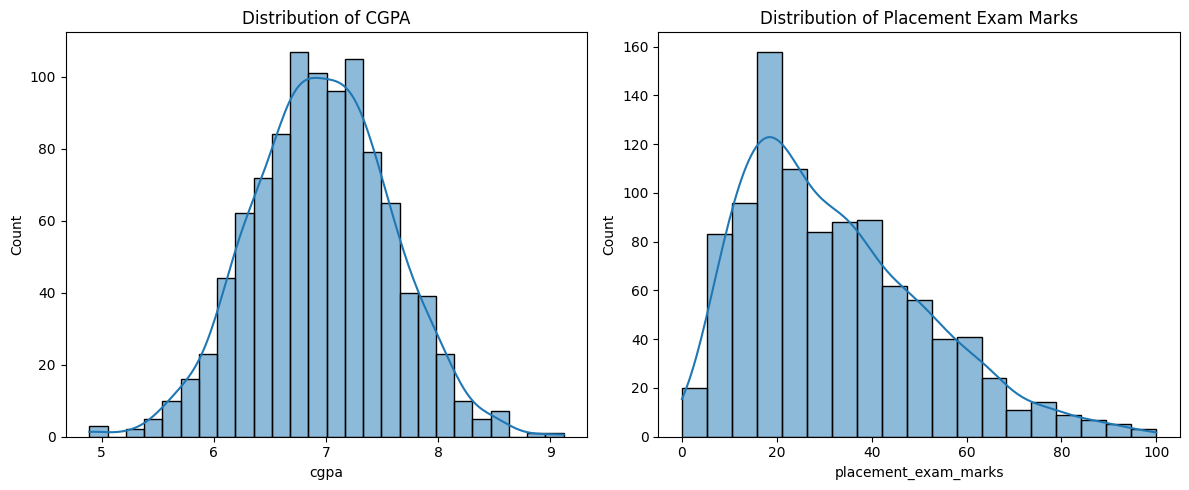

In [137]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True)
plt.title('Distribution of CGPA')

plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True)
plt.title('Distribution of Placement Exam Marks')

plt.tight_layout()
plt.show()

CGPA is ND , exam_marks is not

In [138]:
df.cgpa.describe() 

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [139]:
upper_limit = df.cgpa.mean()  + ( 3 * ( df.cgpa.std()))
upper_limit

np.float64(8.808933625397168)

In [140]:
lower_limit = df.cgpa.mean() - ( 3 * ( df.cgpa.std()))
lower_limit

np.float64(5.113546374602832)

In [141]:
df[(df.cgpa > upper_limit) | (df.cgpa < lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


trimming 

In [142]:
df_trim = df[(df.cgpa < upper_limit ) & (df.cgpa > lower_limit)]

In [143]:
df_trim.shape

(995, 3)

Or we can do the z-score 

In [144]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [145]:
df_z = df.copy()

In [146]:
df_z

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [147]:
df_z['z_score'] = (df.cgpa - df.cgpa.mean())/df.cgpa.std()

In [148]:
df_z

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


anything out of z score 3 and -3 is outlier

In [149]:
df_z.shape

(1000, 4)

In [150]:
df_z[df_z.z_score < -3]

,cgpa,placement_exam_marks,placed,z_score
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [152]:
df_z[df_z.z_score > 3]

,cgpa,placement_exam_marks,placed,z_score
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [154]:
df_z[(df_z.z_score < 3 )& (df_z.z_score > -3 )]

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
